<a href="https://colab.research.google.com/github/MinervaNunez/Proyecto-_Fase3_Python/blob/rama-minerva/Proyecto_Fase_3_BEDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Librerías necesarias

---

In [26]:
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests



---

# Lectura de datos

---



Realizamos la lectura de los datos a partir del archivo .csv obtenido en el módulo anterior.



In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MinervaNunez/Proyecto-_Fase3_Python/main/RNPEDFC_Final.csv',encoding='ISO-8859-1')

El `DataFrame` resultante se muestra a continuación.

In [4]:
df

,anio,fecha,hora,dias_desaparecido,entidad,municipio,localidad,coordenadas,nacionalidad,sexo,edad,estatura,complexion,senas_particulares,discapacidad,dependecia_origen
0,2012,2012-03-18,05:00:00,2234,Sonora,Navojoa,Navojoa,"27.069053, -109.439423",Mexicana,Mujer,7,1.10,Delgada,Tiene Una Cicatriz En La Rodilla Izquierda Por...,Ninguno,FGE - Sonora
1,2007,2007-02-05,02:00:26,4102,Estado De Mexico,Valle De Bravo,Valle De Bravo,"19.16368, -100.134684",Mexicana,Mujer,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
2,2009,2009-03-14,08:30:54,3334,Estado De Mexico,Chalco,Chalco,"19.266337, -98.8978",Mexicana,Hombre,6,1.10,Delgada,"Manchas, Parte Superior De Pierna Derecha, Cic...",Ninguno,FGJ - Estado De Mexico
3,2006,2006-12-23,08:00:28,4146,Estado De Mexico,Tlalnepantla De Baz,Tlalnepantla De Baz,"19.547512, -99.193851",Mexicana,Hombre,10,1.10,Delgada,"Lunares, A La Altura De La Cinturaforma De Man...",Ninguno,FGJ - Estado De Mexico
4,2008,2008-01-11,12:00:17,3762,Estado De Mexico,Toluca,Toluca,"18.078, -91.6552",Mexicana,Hombre,4,1.10,Delgada,No Especificado,Ninguno,FGJ - Estado De Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35896,2018,2018-04-26,08:00:00,4,Puebla,Puebla,Puebla,"19.051201, -98.212116",Mexicana,Hombre,22,1.60,Delgada,Lunar En La Mejilla Y Tatuaje En El Cuello En ...,Ninguno,FGE - Puebla
35897,2018,2018-01-08,11:00:00,112,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Mujer,27,1.70,Robusta,"El Ojo Izquierdo Tiene Un Enfermedad Como Tic,...",Ninguno,PGJ - Colima
35898,2015,2015-02-02,07:00:00,1183,Puebla,Chila,Chilas De Las Flores,"17.965896, -97.864616",Mexicana,Mujer,86,1.77,Mediana,No Especificado,Ninguno,FGE - Puebla
35899,2017,2017-08-22,04:00:00,251,Colima,Villa De Alvarez,Villa De Alvarez,"19.25, -103.73333",Mexicana,Hombre,41,1.76,Robusta,Tatuaje En El Brazo Izquierdo Con La Imagen De...,Ninguno,PGJ - Colima




---

# Distribuciones

---



El `DataFrame` tiene el siguiente tipo de variables:



In [5]:
df.dtypes

anio                    int64
fecha                  object
hora                   object
dias_desaparecido       int64
entidad                object
municipio              object
localidad              object
coordenadas            object
nacionalidad           object
sexo                   object
edad                    int64
estatura              float64
complexion             object
senas_particulares     object
discapacidad           object
dependecia_origen      object
dtype: object



> Gracias a `dtypes` podemos ver que hay tres variables de tipo `int64` y una variable de tipo `float64`.



#Boxplot


Hay cuatro variables numéricas en nuestro dataset: año, días de desaparecido, edad, y estatura. Podemos ver la distribución de cada una mediante un boxplot.


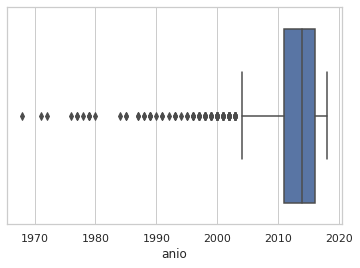

In [6]:
sns.set(style="whitegrid")
sns.boxplot(x=df['anio'])



> Podemos ver que la mayor parte de los casos de personas desaparecidas se han dado en los años más recientes dado que la distribución tiende a los malores más altos del conjunto de datos. También se puede ver que los datos atípicos se extienden a la izquierda de la gráfica.



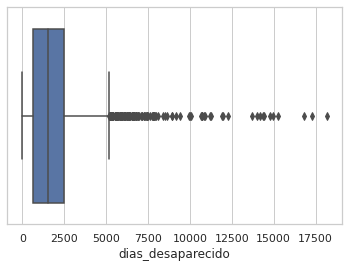

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x=df['dias_desaparecido'])



> La distribución de los días que lleva la víctima desaparecida tiende a los valores pequeños del conjunto de datos. Los valores atípicos se extienden a la derecha del gráfico.



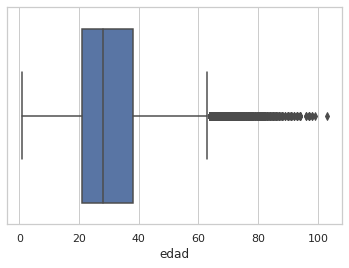

In [8]:
sns.set(style="whitegrid")
sns.boxplot(x=df['edad'])



> El 50% de los datos acerca de la edad registrada en el set de datos pertenece al rango de 20-40 años aproximadamente, teniendo una distribución que tiende a los valores pequeños del conjunto de datos. La distribución que se muestra para esta variable es más dispersa que las mostradas anteriormente.



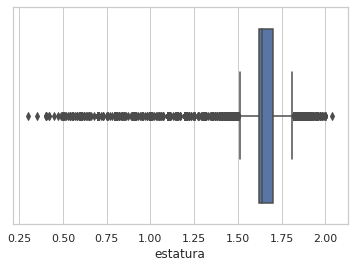

In [9]:
sns.set(style="whitegrid")
sns.boxplot(x=df['estatura'])



> La estatura es la variable que tiene más valores atípicos comparada con las anteriores. Tiene valores atípicos en ambos extremos de la cola. Los datos se concentran en los valores más altos del conjunto de datos.



A pesar de que nuestras variables numéricas tienen "valores atípicos", no serán filtrados del conjunto de datos. Los datos que están fuera del boxplot son casos registrados oficialmente como personas desaparecidas, por lo que bajo el contexto del set de datos sabemos que no son errores o valores anormales. 

#Tabla de Frecuencias

Para obtener más información de nuestras variables numéricas podemos desarrollar otro tipo de visualizaciones. La variable de año puede darnos más información acerca de los casos de personas desaparecidas en cierto rango de tiempo mediante una tabla de frecuencias.

Empezamos obteniendo el rango de nuestro conjunto de datos.


In [10]:
anios = df['anio']
anios.max() - anios.min()

50



> Dado que nuestro rango es muy pequeño, decidimos dividir en 10 segmentos.



Usando `cut` podemos segmentar nuestros datos.

In [11]:
pd.cut(anios, 10)

0        (2008.0, 2013.0]
1        (2003.0, 2008.0]
2        (2008.0, 2013.0]
3        (2003.0, 2008.0]
4        (2003.0, 2008.0]
               ...       
35896    (2013.0, 2018.0]
35897    (2013.0, 2018.0]
35898    (2013.0, 2018.0]
35899    (2013.0, 2018.0]
35900    (2013.0, 2018.0]
Name: anio, Length: 35901, dtype: category
Categories (10, interval[float64, right]): [(1967.95, 1973.0] < (1973.0, 1978.0] < (1978.0, 1983.0] <
                                            (1983.0, 1988.0] ... (1998.0, 2003.0] <
                                            (2003.0, 2008.0] < (2008.0, 2013.0] < (2013.0, 2018.0]]

La serie resultante la podemos agrupar y hacer el conteo de frecuencias.

In [16]:
segmentos = pd.cut(anios, 10)

df['anio'].groupby(segmentos).count()

anio
(1967.95, 1973.0]        3
(1973.0, 1978.0]         4
(1978.0, 1983.0]         4
(1983.0, 1988.0]         7
(1988.0, 1993.0]        11
(1993.0, 1998.0]        25
(1998.0, 2003.0]        73
(2003.0, 2008.0]      1568
(2008.0, 2013.0]     15567
(2013.0, 2018.0]     18639
Name: anio, dtype: int64



> Los casos de personas desaparecidas se concentran en los últimos 10 años de la lista (2008-2018), teniendo 15,567 casos del 2008-2013 y 18,639 casos del 2013-2018.



#Histograma

Las tres variables numéricas restantes pueden visualizarse en un histograma para obtener información más detallada de su distribución. 

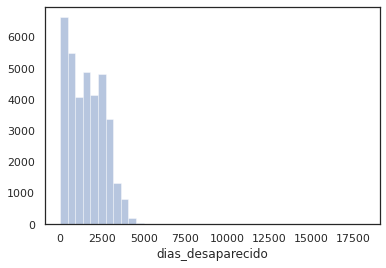

In [25]:
sns.set(style='white')
sns.distplot(df['dias_desaparecido'], kde=False, norm_hist=False, bins=40)

In [32]:
dias_des_valores=df.dias_desaparecido.values
print("kurtosis",kurtosis(dias_des_valores))
print("asimetria",skew(dias_des_valores))

kurtosis 9.10798077972732
asimetria 1.2970145907278083


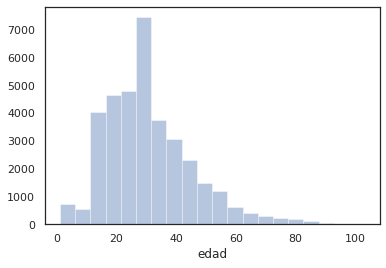

In [20]:
sns.distplot(df['edad'], kde=False, norm_hist=False, bins=20)

In [31]:
edades_valores=df.edad.values
print("kurtosis",kurtosis(edades_valores))
print("asimetria",skew(edades_valores))

kurtosis 1.5296287761320748
asimetria 1.0113409801553876


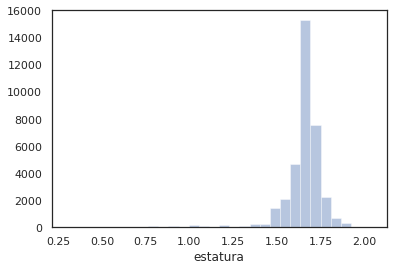

In [23]:
sns.distplot(df['estatura'], kde=False, norm_hist=False, bins=30)

In [33]:
estatura_valores=df.estatura.values
print("kurtosis",kurtosis(estatura_valores))
print("asimetria",skew(estatura_valores))

kurtosis 21.791569364122182
asimetria -3.605588838799281


#Gráfica de densidad